### AXIALLY-LOADED BAR PROBLEM

### GALERKIN METHOD



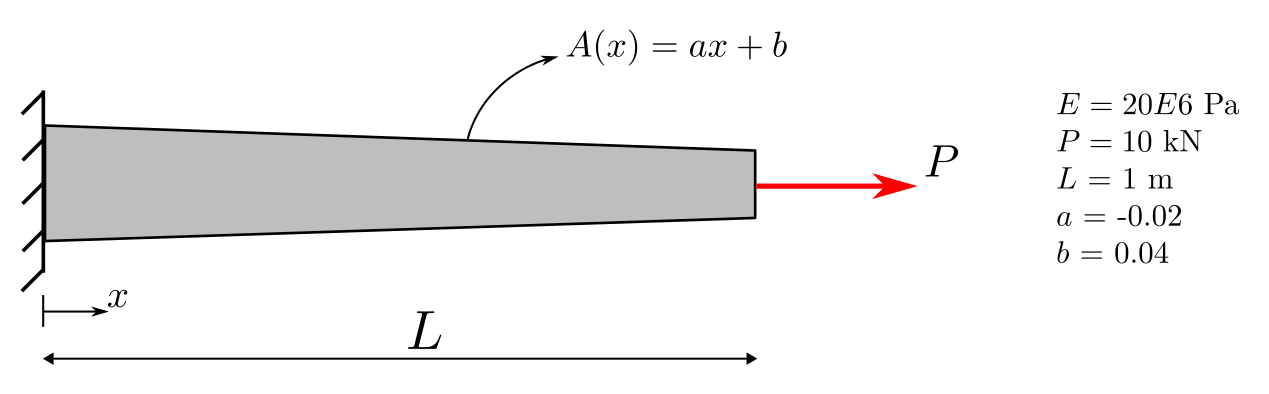


In [1]:
import sympy
from sympy import symbols
from sympy.plotting import plot

In [2]:
x = symbols('x')

In [3]:
a0, a1, a2 = symbols('a0 a1 a2')
phi0, phi1, phi2 = symbols('phi0 phi1 phi2')

In [7]:
phi0 = 1
phi1 = x
phi2 = x**2

In [8]:
E = 20e6
L = 1.0
a = -0.02
b = 0.04
P = 10000

In [9]:
u_app = a0*phi0 + a1*phi1 + a2*phi2

In [10]:
BC1 = u_app.subs(x,0)

In [13]:
u_app

a0 + a1*x + a2*x**2

In [17]:
BC_sol = sympy.solve([BC1],[a0])

In [19]:
BC_sol

{a0: 0}

In [21]:
u_app = u_app.subs(a0,BC_sol[a0])

In [23]:
u_app

a1*x + a2*x**2

In [25]:
LHS1 = sympy.integrate(sympy.diff(phi1,x)*E*(a*x+b)*sympy.diff(u_app,x),(x,0,L))
LHS2 = sympy.integrate(sympy.diff(phi2,x)*E*(a*x+b)*sympy.diff(u_app,x),(x,0,L))

In [27]:
RHS1 = phi1.subs(x,L)*P
RHS2 = phi2.subs(x,L)*P

In [29]:
eq_sol = sympy.solve([LHS1-RHS1, LHS2-RHS2],[a1, a2])

In [31]:
eq_sol

{a1: 0.0115384615384615, a2: 0.00576923076923077}

In [33]:
u_app = u_app.subs(a1,eq_sol[a1])
u_app = u_app.subs(a2,eq_sol[a2])

In [35]:
# Approximate Solution:
u_app

0.00576923076923077*x**2 + 0.0115384615384615*x

In [37]:
from sympy import symbols, Function, dsolve, Eq, diff, solve, simplify
import sympy
import matplotlib.pyplot as plt
x_, E_, a_, b_, P_, L_ = symbols('x_ E_ a_ b_ P_ L_')
u_true = Function('u')(x_)

In [38]:
up = u_true.diff(x_)
eqn = (E_*(a_*x_+b_)*up).diff(x_)

In [41]:
u_general = dsolve(eqn).rhs

In [42]:
u_general

C1 + C2*log(a_*x_ + b_)/a_

In [45]:
bc1 = Eq(u_general.subs(x_, 0), 0)
bc2 = Eq((E_*(a_*x_+b_)*diff(u_general, x_)).subs(x_, L_), P_)

In [47]:
C1, C2 = symbols('C1 C2')
consts = solve([bc1, bc2], (C1, C2))
u_true = u_general.subs(consts)
vals = {E_: 20e6, a_: -0.02, b_: 0.04, P_: 10000, L_: 1.0}
u_true = u_true.subs(vals)

In [49]:
u_true

-0.025*log(0.04 - 0.02*x_) - 0.080471895621705

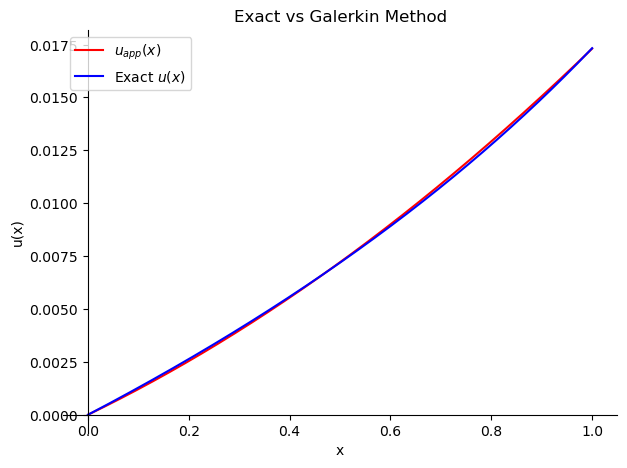

In [51]:
plt = plot( (u_app, (x, 0, 1)), (u_true, (x_, 0, 1)), show=False)
#
plt[0].line_color = 'red'
plt[0].label = '$u_{app}(x)$'
plt[1].line_color = 'blue'
plt[1].label = 'Exact $u(x)$'
#
plt.legend = True
plt.title = 'Exact vs Galerkin Method'
plt.xlabel = 'x'
plt.ylabel = 'u(x)'
plt.show()